In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data as dataframe
sales = pd.read_csv("supermarket_sales.csv")
#sales.head(6)

test = pd.read_csv("test.csv")
test.head()
print(test.shape)

(41088, 8)


In [3]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [4]:
sales.shape

(1000, 17)

In [5]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.972500
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.732061
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000


## EDA

<AxesSubplot:xlabel='Branch', ylabel='count'>

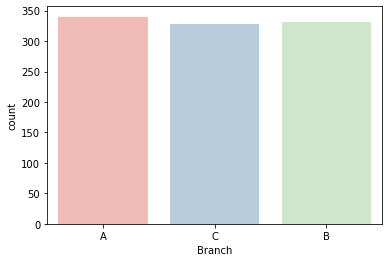

In [6]:
sns.countplot(x = "Branch", data = sales, palette='Pastel1')

In [7]:
# each branch cooresponds to one city so we may get rid of either branch or city 
#total and tax are perfectly coorelated, as are total and gross income so we may drop tax and gross income

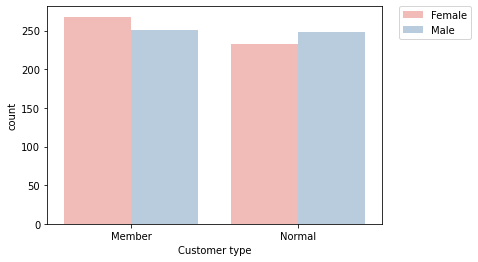

In [8]:
sns.countplot(data = sales , x = 'Customer type' , hue = 'Gender'  , palette='Pastel1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='Customer type', ylabel='Rating'>

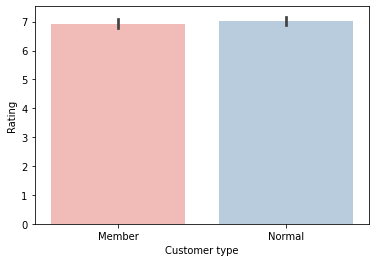

In [9]:
sns.barplot(x = "Customer type", y = "Rating", data = sales, palette='Pastel1')

<AxesSubplot:xlabel='Product line', ylabel='Total'>

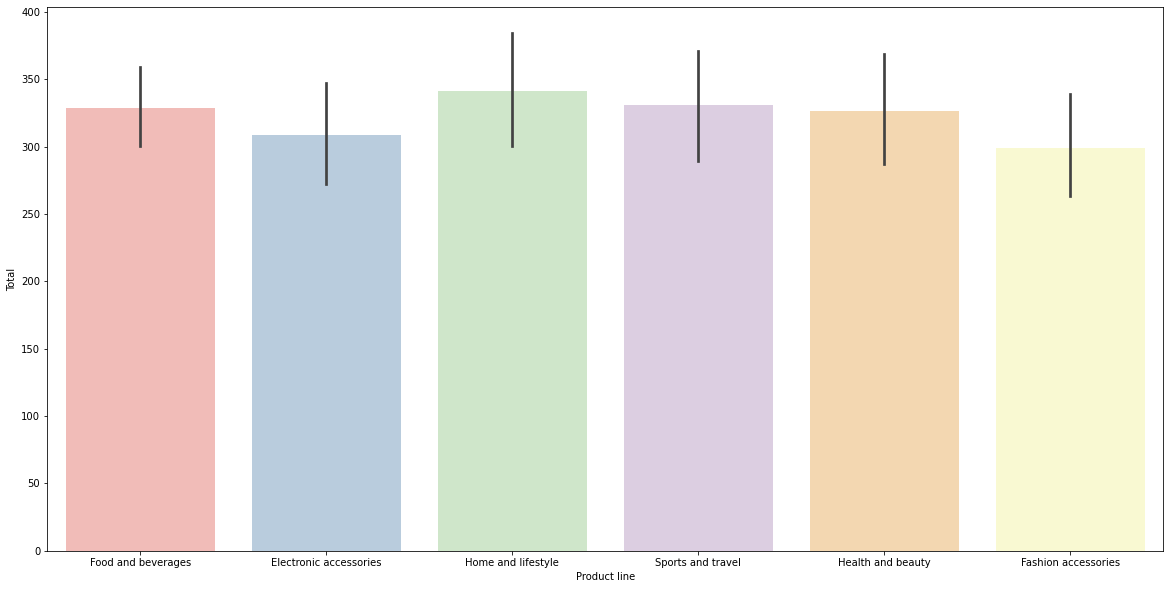

In [10]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Product line',y = 'Total', data = sales, palette='Pastel1')

<AxesSubplot:xlabel='Product line', ylabel='Total'>

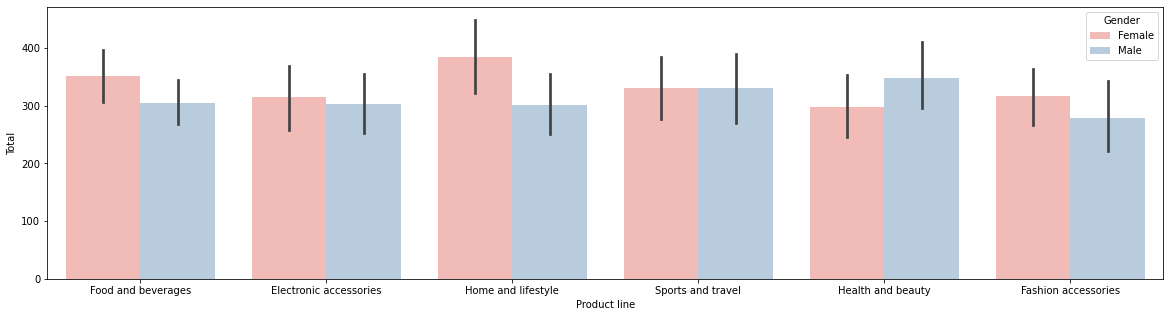

In [11]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'Product line',y = 'Total', data = sales, hue ='Gender', palette='Pastel1')

In [12]:
# the unit price of all product lines are nearly same as well as their error margins.
# this is also true when y = 'Ratings', the product unit price difference between both 
# genders is slighly noticeable and has large margins, so maybe significant. if need be, 
# product line column will also be dropped to improve performance.

<AxesSubplot:xlabel='Payment', ylabel='count'>

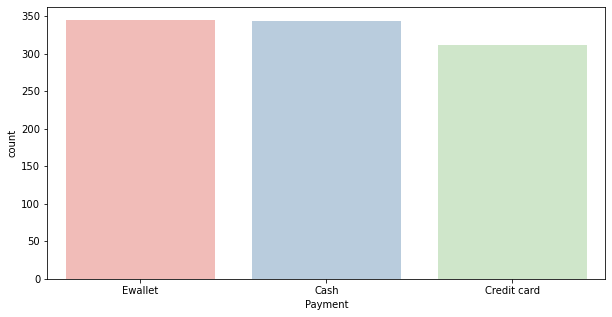

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Payment', data = sales, palette='Pastel1')

<AxesSubplot:xlabel='Payment', ylabel='count'>

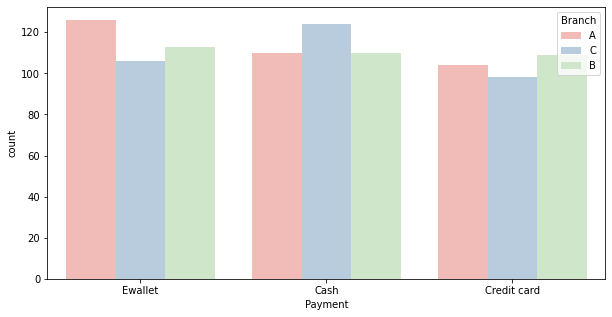

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Payment', data = sales, hue = 'Branch', palette='Pastel1')

<AxesSubplot:xlabel='Payment', ylabel='count'>

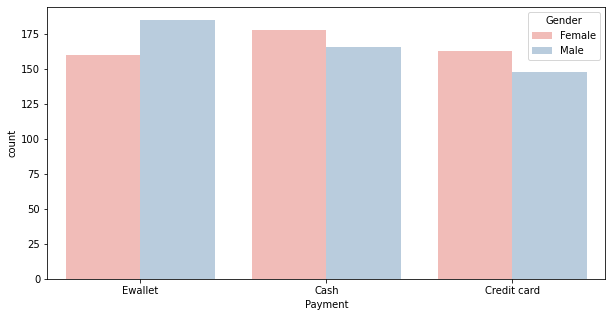

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Payment', data = sales, hue = 'Gender', palette='Pastel1')

In [16]:
# people use credit card less often than other options but the usage is still strongly comparable. 
# within cities, the usage differs only by slight amounts. 
# Not a eye-catching difference in gender specific usage either. 
# lets see the relationship between ratings and payment method

<AxesSubplot:xlabel='Payment', ylabel='Rating'>

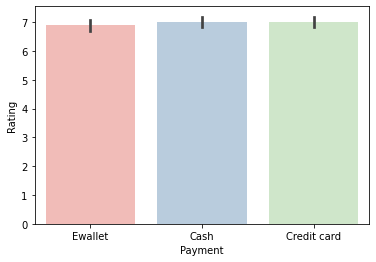

In [17]:
sns.barplot(x = 'Payment', y = 'Rating', data = sales, palette='Pastel1')

In [18]:
# there is no variation in payment so payment may be dropped

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

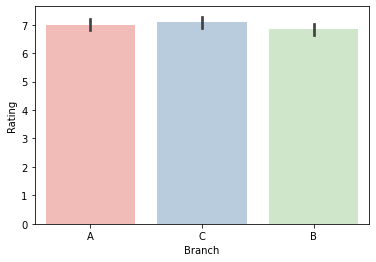

In [19]:

sns.barplot(x = 'Branch', y = 'Rating', data = sales, palette='Pastel1')

<AxesSubplot:xlabel='Customer type', ylabel='Rating'>

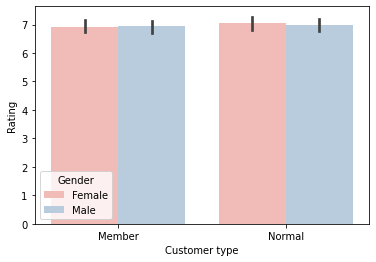

In [20]:
sns.barplot(x = 'Customer type', y = 'Rating', data = sales, hue = 'Gender', palette='Pastel1') 

In [21]:
# Gender and Customer type do not have a significant role in ratings 

In [22]:
sales['Hour'] = pd.to_datetime(sales['Time']).dt.hour

hours = sales.groupby(['Hour'])[['Quantity']].apply(sum).reset_index().sort_values(by=['Quantity'], ascending = False)
hours.head(10)

,Hour,Quantity
9,19,649
3,13,585
5,15,530
0,10,525
1,11,513
2,12,501
4,14,495
8,18,475
6,16,420
7,17,415


<AxesSubplot:xlabel='Hour', ylabel='Quantity'>

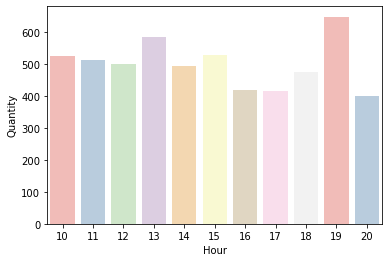

In [23]:
sns.barplot(x='Hour',y='Quantity', data=hours, palette='Pastel1')

In [24]:
# from this table we can see the best time for sales is 1pm or 7pm

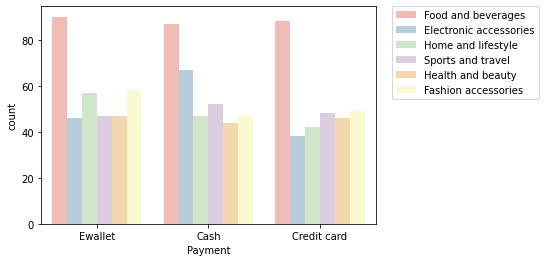

In [25]:
sns.countplot(data = sales , x = 'Payment' , hue = 'Product line'  , palette='Pastel1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Pre-processing

In [26]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Hour'],
      dtype='object')

## Data Cleaning

In [27]:
# ID is different for every entry and gross percent is the same for every entry, they will be dropped

In [28]:
sales.drop(['Invoice ID','gross margin percentage'], axis = 1, inplace = True)

In [29]:
# we have already established that city and branch are the same thing. 
# we will be deleting branch. similarly, total, tax, gross income are perfectly correlated.
# we will be dropping tax and gross income.
# data and time are also excluded but may be added back if the model needs improvement

In [30]:
sales.drop(['City','Tax 5%','gross income'], axis = 1, inplace = True)

In [31]:
sales.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,Rating,Hour
0,A,Member,Female,Food and beverages,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,9.1,13
1,C,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,9.6,10
2,A,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,7.4,13
3,A,Member,Male,Food and beverages,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,8.4,20
4,A,Member,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,5.3,10


In [32]:
train_dummy = pd.get_dummies(sales)
train_dummy.head()

,Unit price,Quantity,Total,cogs,Rating,Hour,Branch_A,Branch_B,Branch_C,Customer type_Member,...,Time_20:50,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,548.9715,522.83,9.1,13,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,15.28,5,80.2200,76.40,9.6,10,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,46.33,7,340.5255,324.31,7.4,13,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,58.22,8,489.0480,465.76,8.4,20,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,86.31,7,634.3785,604.17,5.3,10,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [33]:
train_dummy = train_dummy.round(0)
train_dummy.head()

,Unit price,Quantity,Total,cogs,Rating,Hour,Branch_A,Branch_B,Branch_C,Customer type_Member,...,Time_20:50,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,75.0,7,549.0,523.0,9.0,13,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,15.0,5,80.0,76.0,10.0,10,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,46.0,7,341.0,324.0,7.0,13,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,58.0,8,489.0,466.0,8.0,20,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,86.0,7,634.0,604.0,5.0,10,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## Model Training

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [35]:
X = train_dummy.drop('Quantity', axis = 1)
y = train_dummy['Quantity']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = False)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions 

In [37]:
predictions = dtree.predict(X_test)

In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.38
MSE: 0.64
RMSE: 0.8


In [40]:
# this gives 100% accuracy for our model

In [5]:
%%time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import operator
import matplotlib
matplotlib.use("Agg") #Needed to save figures
import matplotlib.pyplot as plt

def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    outfile.close()

def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

# Gather some features
def build_features(features, data):
    # remove NaNs
    data.fillna(0, inplace=True)
    data.loc[data.Open.isnull(), 'Open'] = 1
    # Use some properties directly
    features.extend(['Store', 'CompetitionDistance', 'Promo', 'Promo2', 'SchoolHoliday'])

    # Label encode some features
    features.extend(['StoreType', 'Assortment', 'StateHoliday'])
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)

    features.extend(['DayOfWeek', 'Month', 'Day', 'Year', 'WeekOfYear'])
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear

    # CompetionOpen en PromoOpen from https://www.kaggle.com/ananya77041/rossmann-store-sales/randomforestpython/code
    # Calculate time competition open time in months
    features.append('CompetitionOpen')
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + \
        (data.Month - data.CompetitionOpenSinceMonth)
    # Promo open time in months
    features.append('PromoOpen')
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + \
        (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    data.loc[data.Promo2SinceYear == 0, 'PromoOpen'] = 0

    # Indicate that sales on that day are in promo interval
    features.append('IsPromoMonth')
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1

    return data


## Start of main script

print("Load the training, test and store data using pandas")
types = {'CompetitionOpenSinceYear': np.dtype(int),
         'CompetitionOpenSinceMonth': np.dtype(int),
         'StateHoliday': np.dtype(str),
         'Promo2SinceWeek': np.dtype(int),
         'SchoolHoliday': np.dtype(float),
         'PromoInterval': np.dtype(str)}
train = pd.read_csv("train.csv", parse_dates=[2], dtype=types)
test = pd.read_csv("test.csv", parse_dates=[3], dtype=types)
store = pd.read_csv("store.csv")

print("Assume store open, if not provided")
train.fillna(1, inplace=True)
test.fillna(1, inplace=True)

print("Consider only open stores for training. Closed stores wont count into the score.")
train = train[train["Open"] != 0]
print("Use only Sales bigger then zero. Simplifies calculation of rmspe")
train = train[train["Sales"] > 0]

print("Join with store")
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

features = []

print("augment features")
build_features(features, train)
build_features([], test)
print(features)

print('training data processed')

params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 300

print("Train a XGBoost model")
X_train, X_valid = train_test_split(train, test_size=0.1, random_state=10)
y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)
dtrain = xgb.DMatrix(X_train[features], y_train)
dvalid = xgb.DMatrix(X_valid[features], y_valid)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)

print("Validating")
yhat = gbm.predict(xgb.DMatrix(X_valid[features]))
error = rmspe(X_valid.Sales.values, np.expm1(yhat))
print('RMSPE: {:.6f}'.format(error))

print("Make predictions on the test set")
dtest = xgb.DMatrix(test[features])
test_probs = gbm.predict(dtest)
# Make Submission
result = pd.DataFrame({"Id": test["Id"], 'Sales': np.expm1(test_probs)})
result.to_csv("xgboost_10_submission.csv", index=False)

# XGB feature importances
# Based on https://www.kaggle.com/mmueller/liberty-mutual-group-property-inspection-prediction/xgb-feature-importance-python/code

create_feature_map(features)
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()


Load the training, test and store data using pandas
Assume store open, if not provided
Consider only open stores for training. Closed stores wont count into the score.
Use only Sales bigger then zero. Simplifies calculation of rmspe
Join with store
augment features


<timed exec>:44: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
<timed exec>:44: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


['Store', 'CompetitionDistance', 'Promo', 'Promo2', 'SchoolHoliday', 'StoreType', 'Assortment', 'StateHoliday', 'DayOfWeek', 'Month', 'Day', 'Year', 'WeekOfYear', 'CompetitionOpen', 'PromoOpen', 'IsPromoMonth']
training data processed
Train a XGBoost model
[20:18:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:5.79358	train-rmspe:0.99684	eval-rmse:5.79602	eval-rmspe:0.99685


[90]	train-rmse:0.10401	train-rmspe:0.13159	eval-rmse:0.11219	eval-rmspe:0.12363
[91]	train-rmse:0.10371	train-rmspe:0.13121	eval-rmse:0.11193	eval-rmspe:0.12338
[92]	train-rmse:0.10330	train-rmspe:0.13075	eval-rmse:0.11163	eval-rmspe:0.12309
[93]	train-rmse:0.10289	train-rmspe:0.13036	eval-rmse:0.11130	eval-rmspe:0.12276
[94]	train-rmse:0.10237	train-rmspe:0.12231	eval-rmse:0.11091	eval-rmspe:0.12237
[95]	train-rmse:0.10226	train-rmspe:0.12214	eval-rmse:0.11084	eval-rmspe:0.12228
[96]	train-rmse:0.10211	train-rmspe:0.12198	eval-rmse:0.11071	eval-rmspe:0.12215
[97]	train-rmse:0.10179	train-rmspe:0.12165	eval-rmse:0.11047	eval-rmspe:0.12195
[98]	train-rmse:0.10162	train-rmspe:0.12151	eval-rmse:0.11033	eval-rmspe:0.12181
[99]	train-rmse:0.10106	train-rmspe:0.12045	eval-rmse:0.10980	eval-rmspe:0.12122
[100]	train-rmse:0.10087	train-rmspe:0.12027	eval-rmse:0.10966	eval-rmspe:0.12106
[101]	train-rmse:0.10066	train-rmspe:0.12007	eval-rmse:0.10948	eval-rmspe:0.12088
[102]	train-rmse:0.10050	t

[191]	train-rmse:0.08496	train-rmspe:0.09656	eval-rmse:0.09941	eval-rmspe:0.10977
[192]	train-rmse:0.08492	train-rmspe:0.09652	eval-rmse:0.09939	eval-rmspe:0.10976
[193]	train-rmse:0.08481	train-rmspe:0.09642	eval-rmse:0.09933	eval-rmspe:0.10970
[194]	train-rmse:0.08470	train-rmspe:0.09626	eval-rmse:0.09928	eval-rmspe:0.10961
[195]	train-rmse:0.08459	train-rmspe:0.09607	eval-rmse:0.09921	eval-rmspe:0.10956
[196]	train-rmse:0.08429	train-rmspe:0.09568	eval-rmse:0.09901	eval-rmspe:0.10933
[197]	train-rmse:0.08420	train-rmspe:0.09557	eval-rmse:0.09897	eval-rmspe:0.10928
[198]	train-rmse:0.08413	train-rmspe:0.09543	eval-rmse:0.09891	eval-rmspe:0.10911
[199]	train-rmse:0.08386	train-rmspe:0.09516	eval-rmse:0.09869	eval-rmspe:0.10889
[200]	train-rmse:0.08374	train-rmspe:0.09502	eval-rmse:0.09863	eval-rmspe:0.10884
[201]	train-rmse:0.08364	train-rmspe:0.09493	eval-rmse:0.09860	eval-rmspe:0.10882
[202]	train-rmse:0.08348	train-rmspe:0.09472	eval-rmse:0.09849	eval-rmspe:0.10870
[203]	train-rmse

[291]	train-rmse:0.07512	train-rmspe:0.08066	eval-rmse:0.09504	eval-rmspe:0.10519
[292]	train-rmse:0.07502	train-rmspe:0.08056	eval-rmse:0.09502	eval-rmspe:0.10522
[293]	train-rmse:0.07488	train-rmspe:0.08042	eval-rmse:0.09492	eval-rmspe:0.10513
[294]	train-rmse:0.07478	train-rmspe:0.08030	eval-rmse:0.09491	eval-rmspe:0.10512
[295]	train-rmse:0.07472	train-rmspe:0.08023	eval-rmse:0.09489	eval-rmspe:0.10512
[296]	train-rmse:0.07463	train-rmspe:0.08012	eval-rmse:0.09487	eval-rmspe:0.10510
[297]	train-rmse:0.07457	train-rmspe:0.08005	eval-rmse:0.09486	eval-rmspe:0.10509
[298]	train-rmse:0.07451	train-rmspe:0.07999	eval-rmse:0.09482	eval-rmspe:0.10505
[299]	train-rmse:0.07447	train-rmspe:0.07992	eval-rmse:0.09481	eval-rmspe:0.10504
Validating
RMSPE: 0.105042
Make predictions on the test set
CPU times: user 11min 41s, sys: 26 s, total: 12min 7s
Wall time: 3min 46s


In [2]:
featp = df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
fig_featp = featp.get_figure()
fig_featp.savefig('feature_importance_xgb.png', bbox_inches='tight', pad_inches=1)

https://www.kaggle.com/calladrus/supermarket-sales-eda